# MidTerm Project

In [336]:
import sys
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [337]:
real_estate_df = pd.read_csv('Data_MidTermProject_Real-State-Regression_Original.csv', sep=';')

## Renaming Columns

- standardization of names for the sake of consistency
- addinng information if needed for the sake of clarity
- specifying terms in order to avoid ambiguity with commands in Python or MySQL

In [338]:
real_estate_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [339]:
real_estate_df = real_estate_df.rename(columns={
    "id":"house_id",
    "date":"sale_date",
    "sqft_living15":"sqft_living_15neighbors",
    "sqft_lot15":"sqft_lot_15neighbors",
    "floors":"house_floors",
    "yr_built":"year_construction",
    "yr_renovated":"year_renovation",
    "floors":"house_floors",
    "waterfront":"kcgs_waterfront",
    "view":"kcgs_view",
    "condition":"kcgs_condition",
    "grade":"kcgs_grade",
    "lat":"latitude",
    "long":"longitude",
    "zipcode":"zip_code"})

## Changing Data Types

In [340]:
real_estate_df.dtypes

house_id                    int64
sale_date                  object
bedrooms                    int64
bathrooms                  object
sqft_living                 int64
sqft_lot                    int64
house_floors               object
kcgs_waterfront             int64
kcgs_view                   int64
kcgs_condition              int64
kcgs_grade                  int64
sqft_above                  int64
sqft_basement               int64
year_construction           int64
year_renovation             int64
zip_code                    int64
latitude                   object
longitude                  object
sqft_living_15neighbors     int64
sqft_lot_15neighbors        int64
price                       int64
dtype: object

Smaller rooms that are measurd as 0.25, 0.5 or 0.75 in the dataset are counted as a proper room.
Half floors are equally considered as single floors.

In [341]:
real_estate_df['bathrooms'] = real_estate_df['bathrooms'].str.replace(',','.')
real_estate_df['house_floors'] = real_estate_df['house_floors'].str.replace(',','.')

In [342]:
real_estate_df['house_id']=real_estate_df['house_id'].astype(int)
real_estate_df["house_floors"]=real_estate_df["house_floors"].astype(float).astype(int)
real_estate_df['bathrooms']=real_estate_df['bathrooms'].astype(float).astype(int)
real_estate_df['bathrooms']=real_estate_df['bathrooms'].astype(int)
real_estate_df['price']=real_estate_df['price'].astype(float)

## Scaling

To get a better idea of the houses' size, information in sqft are changed into m2.

In [343]:
real_estate_df['m2_living'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_living']))
real_estate_df['m2_lot'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_lot']))
real_estate_df['m2_above'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_above']))
real_estate_df['m2_basement'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_basement']))
real_estate_df['m2_living_15neighbors'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_living_15neighbors']))
real_estate_df['m2_lot_15neighbors'] = list(map(lambda x: x / 10.76, real_estate_df['sqft_lot_15neighbors']))

## Checking for duplicates

In [344]:
real_estate_df.drop_duplicates(inplace = True) 

In [345]:
real_estate_df.shape

(21597, 27)

21.597 observations without any duplicats

## Replacing Null Values

real_estate_df.isna().sum()

## Eliminating unnecessary columns

In [346]:
small_real_estate_df = real_estate_df.drop(['latitude','longitude',
                                      'house_id',
                                      'sqft_living','sqft_lot',
                                      'sqft_living_15neighbors','sqft_lot_15neighbors',
                                      'sqft_above','sqft_basement', 
                                      'm2_lot_15neighbors','m2_living_15neighbors', 
                                      'm2_above','m2_basement', 
                                      'sale_date'], axis='columns')

## Categories

### Houses with a view to the waterfront

In [347]:
small_real_estate_df['kcgs_waterfront'].value_counts()

0    21434
1      163
Name: kcgs_waterfront, dtype: int64

### Evaluation of the view (grades 1-4)

In [348]:
small_real_estate_df['kcgs_view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: kcgs_view, dtype: int64

### Rating of the general Building Condition

- 1 = Poor - Worn out
- 2 = Fair - Badly worn
- 3 = Average
- 4 = Good
- 5 = Very Good

In [349]:
small_real_estate_df['kcgs_condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: kcgs_condition, dtype: int64

### Building grade (based on the King County Grading System)

- 1-3 Falls short of minimum building standards (cabin or inferior structure)
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design, better materials in exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 High quality features, better finish work and design quality in the floor plans, bigger in size.
- 11 Custom design, higher quality finish work with added amenities and luxurious options.
- 12 Custom design and excellent builders. Materials of highest quality, all conveniences are present.
- 13 Generally custom designed and built. Mansion level, highest quality.

In [350]:
small_real_estate_df['kcgs_grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: kcgs_grade, dtype: int64

## Cleaned Data Set

In [351]:
small_real_estate_df.to_csv('Data-Cleaned_MidTermProject_Real-State-Regression.csv', encoding="utf-8")

In [352]:
small_real_estate_df.dtypes

bedrooms               int64
bathrooms              int64
house_floors           int64
kcgs_waterfront        int64
kcgs_view              int64
kcgs_condition         int64
kcgs_grade             int64
year_construction      int64
year_renovation        int64
zip_code               int64
price                float64
m2_living            float64
m2_lot               float64
dtype: object

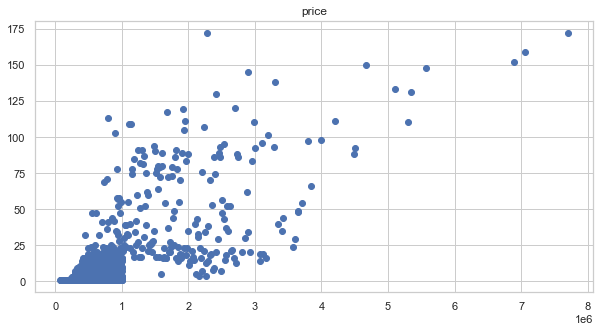

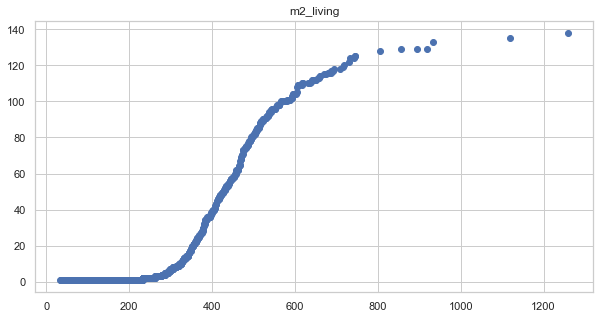

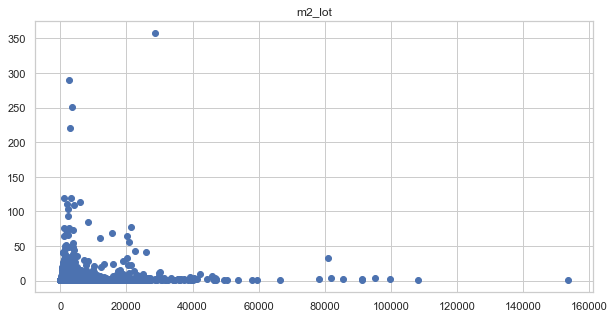

In [353]:
for g in small_real_estate_df.select_dtypes(float):
    plt.figure(figsize=(10,5))
    plt.scatter(small_real_estate_df[g].unique(), small_real_estate_df[g].value_counts())
    plt.title(g)
    plt.show()

### Checking on Correalation 

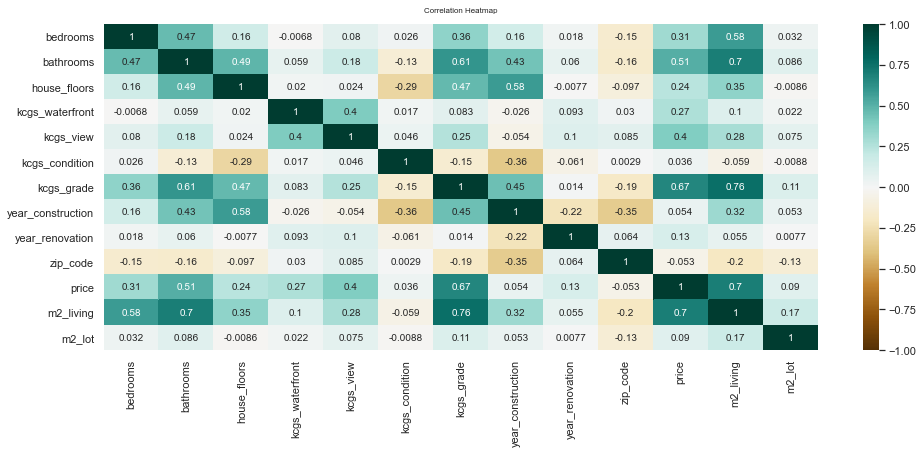

In [354]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(small_real_estate_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

plt.show()

## Checking the Distribution

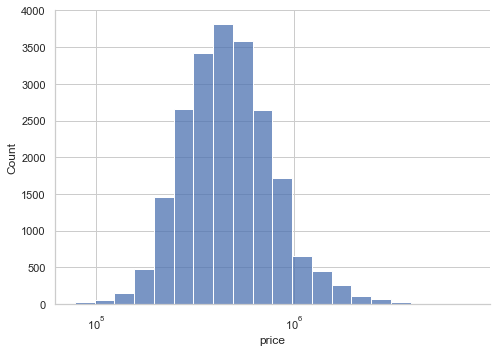

In [355]:
sns.displot(
    data=small_real_estate_df,
    x="price",
    kind="hist",
    aspect=1.4,
    log_scale=10,
    bins=20
)

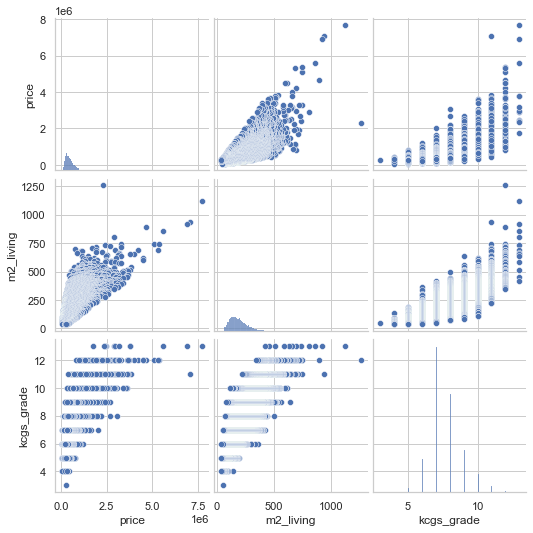

In [356]:
sns.pairplot(small_real_estate_df, vars=["price", "m2_living", "kcgs_grade"])

## Linear Regression

In [265]:
lr_data = small_real_estate_df

In [266]:
x = lr_data["m2_living"]
y = lr_data["price"]

In [267]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [268]:
def linear_function(x):
 return slope * x + intercept

In [269]:
my_first_model = list(map(linear_function, x))

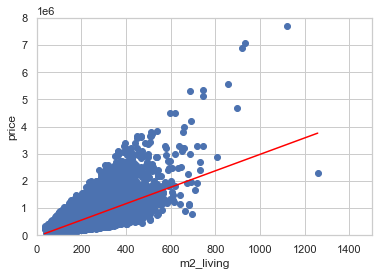

In [270]:
plt.scatter(x,y)
plt.plot(x, my_first_model, color='red')
plt.ylim(ymin=0, ymax=8000000)
plt.xlim(xmin=0, xmax=1500)
plt.xlabel('m2_living')
plt.ylabel('price')

plt.show()

## Encoding

In [271]:
from sklearn.preprocessing import OrdinalEncoder

In [272]:
lr_data['kcgs_grade'].to_numpy().reshape(-1,1)

array([[12],
       [13],
       [11],
       ...,
       [ 6],
       [ 5],
       [ 5]])

In [273]:
encoder = OrdinalEncoder()

In [274]:
encoder.fit_transform(lr_data['kcgs_grade'].to_numpy().reshape(-1,1)).reshape(1,-1).size

21597

In [275]:
kcgs_grade_encoded = pd.DataFrame(encoder.fit_transform(lr_data['kcgs_grade'].
                                                    to_numpy().reshape(-1,1)).reshape(-1,1))

In [277]:
X = pd.concat([kcgs_grade_encoded, pd.DataFrame(x)], axis=1)

In [278]:
X.columns = ['kcgs_grade_encoded', 'm2_living']
### x = ['m2_living']
### X = ['kcgs_grade_encoded', 'm2_living']

In [281]:
X

,kcgs_grade_encoded,m2_living
0,9.0,1258.364312
1,10.0,1119.888476
2,8.0,933.085502
3,10.0,919.144981
4,9.0,895.910781
...,...,...
21592,2.0,39.033457
21593,1.0,38.104089
21594,3.0,36.245353
21595,2.0,35.315985


In [335]:
import statsmodels.api as smf
## X = smf.add_constant(x) - Rafa

model = smf.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                        0.00
Time:                        20:04:08   Log-Likelihood:                     -3.0011e+05
No. Observations:               21597   AIC:                                  6.002e+05
Df Residuals:                   21596   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [311]:
import statsmodels.formula.api as smf # statistical library in Python

model = smf.ols('price ~ m2_living', data = lr_data)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:48   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.399e+04   4410.023     -9.975      0.0

In [312]:
# multiple linear regression
model = smf.ols('price ~ m2_living + kcgs_grade', data=lr_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:16:52   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.028e+05   1.33e+04    -45.181      0.0

In [316]:
import statsmodels.api as smf
## X = smf.add_constant(x)

model = smf.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                          5.706e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:20:12   Log-Likelihood:                     -2.9998e+05
No. Observations:               21597   AIC:                                  6.000e+05
Df Residuals:                   21595   BIC:                                  6.000e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [317]:
def predict_house_price(X):
 return(3022.1675 * X + -4.4e+04)

print(predict_house_price(1500))
print(predict_house_price(1600))
print(predict_house_price(1700))

4489251.25
4791468.0
5093684.75


## Fitting the Linear Regression Model

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
y = np.array(y)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [321]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [322]:
y_pred_train = lm.predict(x_train)
y_pred_test  = lm.predict(X_test)

In [323]:
print(lm.intercept_)
print(lm.coef_)

[-298189.40871577]
[[97878.55905178  1979.30797553]]


In [329]:
lm.score(X,y)

0.5346765143070449

## Plotting

Text(0.5, 1.0, 'Residual histogram')

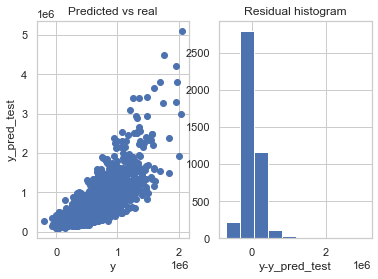

In [324]:
fig, ax = plt.subplots(1,2)
ax[0].plot(y_pred_test, y_test, 'o')
ax[0].set_xlabel("y")
ax[0].set_ylabel("y_pred_test")
ax[0].set_title("Predicted vs real")

### Checking for normal distribution
ax[1].hist(y_test - y_pred_test)
ax[1].set_xlabel("y-y_pred_test")
ax[1].set_title("Residual histogram")

## Feature Importance

In [325]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

AttributeError: 'OLS' object has no attribute 'coef_'

In [326]:
#residual vs. predictor plot
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model, 'm2_living', fig=fig)

AttributeError: 'OLS' object has no attribute 'model'

<Figure size 864x576 with 0 Axes>